In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
titanic = pd.read_csv(r'C:\Users\manjunath\Downloads\train.csv')

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


"""
Data Information
survival=Survival   , 0 = No, 1 = Yes
pclass  = Ticket class    ,1 = 1st, 2 = 2nd, 3 = 3rd
sex     = Sex
Age     =Age in years
sibsp   = # of siblings / spouses aboard the Titanic
parch   = # of parents / children aboard the Titanic
ticket  = Ticket number 
fare    = Passenger fare
cabin   = Cabin number
embarked= Port of Embarkation

""""

# EDA OF DATA

In [8]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
  min_val, max_val = titanic[col].min(), titanic[col].max()
  # print('Minimum value of ' + col + ' is ' + str(min_val) + ' and Maximum value of ' +   col + ' is ' + str(max_val))
  # print("Minimum value of ", col, " is ", min_val," and Maximum value of ", col," is ",max_val)
  print(f'Minimum value of {col} is {min_val} and Maximum value of {col} is {max_val}')

Minimum value of Age is 0.42 and Maximum value of Age is 80.0
Minimum value of SibSp is 0 and Maximum value of SibSp is 8
Minimum value of Parch is 0 and Maximum value of Parch is 6
Minimum value of Fare is 0.0 and Maximum value of Fare is 512.3292


In [14]:
for col in ['Pclass', 'Sex', 'Embarked']:
  vals = titanic[col].unique()
  print(f'Unique values/classes in {col} are {vals}' )

Unique values/classes in Pclass are [3 1 2]
Unique values/classes in Sex are ['male' 'female']
Unique values/classes in Embarked are ['S' 'C' 'Q' nan]


In [15]:
titanic[titanic['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [16]:
titanic[titanic['Age'] <= 18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [17]:
titanic[titanic['Age'] >= 18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
titanic[titanic['Age'] == titanic.Age.min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


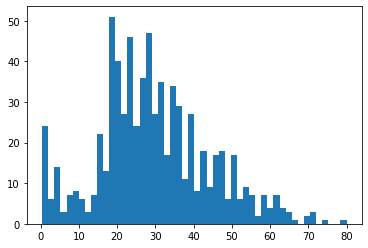

In [19]:
#If you have numerical data always try using histogram

#Histogram
plt.hist(titanic['Age'],bins=50)
plt.show()

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

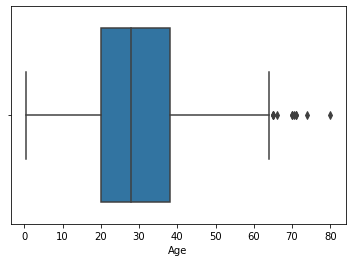

In [20]:
#Boxplot 

sns.boxplot(titanic['Age'])

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

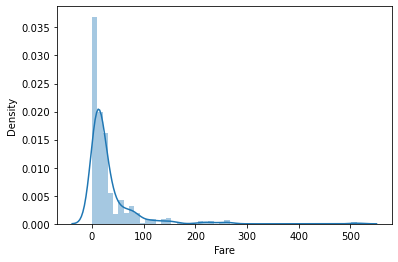

In [21]:
sns.distplot(titanic.Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

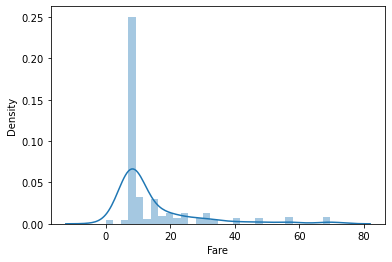

In [22]:
sns.distplot(titanic[(titanic.Pclass == 3) & (titanic.Embarked == 'S')].Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

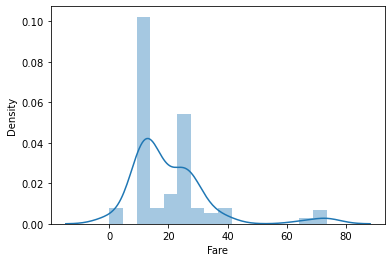

In [23]:
sns.distplot(titanic[(titanic.Pclass == 2) & (titanic.Embarked == 'S')].Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

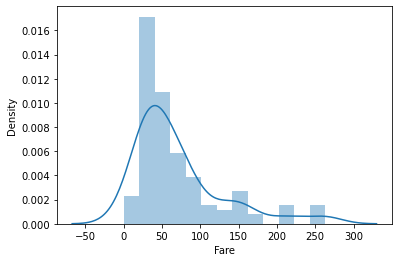

In [24]:
sns.distplot(titanic[(titanic.Pclass == 1) & (titanic.Embarked == 'S')].Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

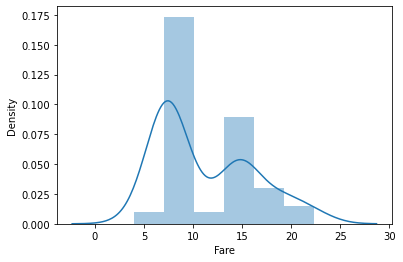

In [25]:
sns.distplot(titanic[(titanic.Pclass == 3) & (titanic.Embarked == 'C')].Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

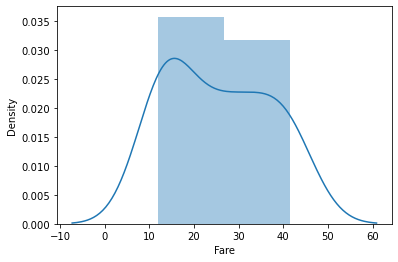

In [26]:
sns.distplot(titanic[(titanic.Pclass == 2) & (titanic.Embarked == 'C')].Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

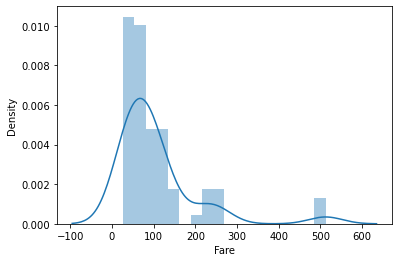

In [27]:
sns.distplot(titanic[(titanic.Pclass == 1) & (titanic.Embarked == 'C')].Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

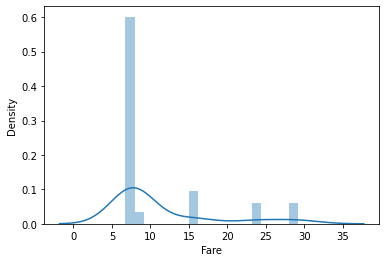

In [28]:
sns.distplot(titanic[(titanic.Pclass == 3) & (titanic.Embarked == 'Q')].Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

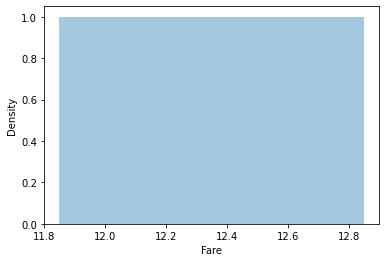

In [29]:
sns.distplot(titanic[(titanic.Pclass == 2) & (titanic.Embarked == 'Q')].Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

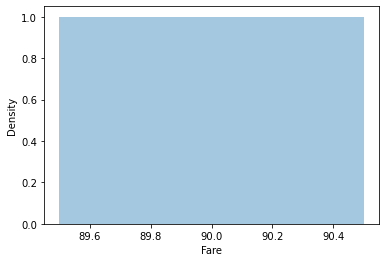

In [30]:
sns.distplot(titanic[(titanic.Pclass == 1) & (titanic.Embarked == 'Q')].Fare)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

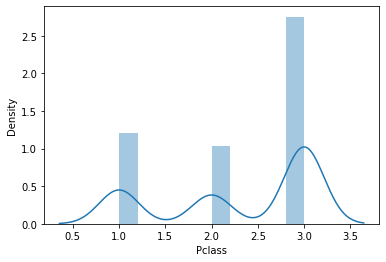

In [31]:
sns.distplot(titanic.Pclass)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

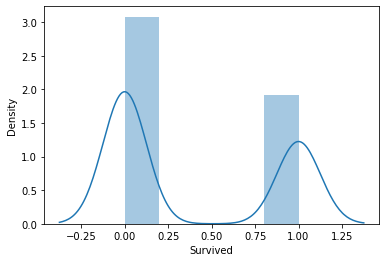

In [32]:
sns.distplot(titanic.Survived)

(139, 12)


C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


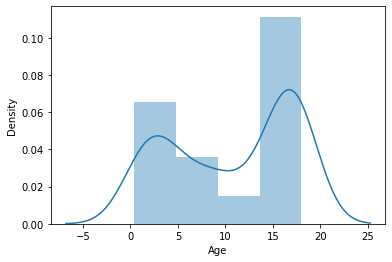

In [33]:
children = titanic[titanic['Age'] <= 18]
sns.distplot(children.Age)
print(children.shape)

(575, 12)


C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


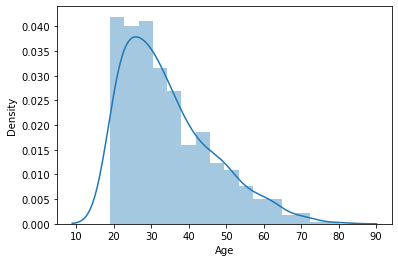

In [45]:
adults = titanic[titanic['Age'] > 18]
sns.distplot(adults.Age)
print(adults.shape)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

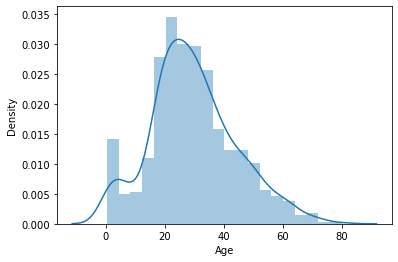

In [34]:
sns.distplot(titanic.Age)

male      577
female    314
Name: Sex, dtype: int64

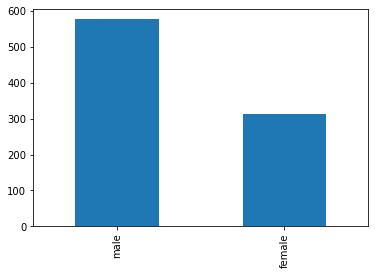

In [35]:
titanic.Sex.value_counts().plot(kind='bar')
titanic.Sex.value_counts()

<AxesSubplot:ylabel='Sex'>

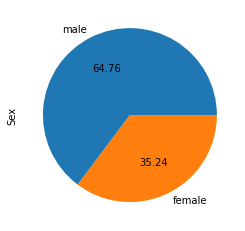

In [36]:
titanic['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

S    644
C    168
Q     77
Name: Embarked, dtype: int64

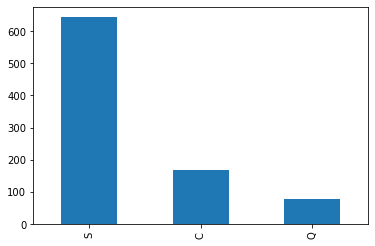

In [37]:
titanic.Embarked.value_counts().plot(kind='bar')
titanic.Embarked.value_counts()

<AxesSubplot:ylabel='Embarked'>

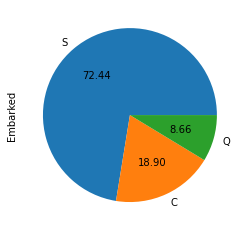

In [38]:
titanic['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

In [39]:
titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr() 
# correlation value between -1 and -0.5 signifies high negative correlation or inverse relationship
# correlation value between -0.5 and 0.5 signifies no correlation
# correlation value between 0.5 and 1 signifies high positive correlation or proportional relationship

# correlation value between -1 and -0.8 signifies high negative correlation or inverse relationship
# correlation value between -0.8 and 0.8 signifies no correlation
# correlation value between 0.8 and 1 signifies high positive correlation or proportional relationship

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:title={'center':'Correlation of Numerical Variable including Target variable'}>

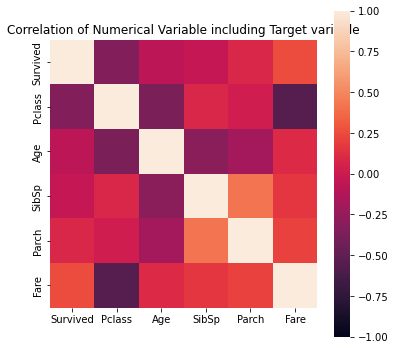

In [40]:
f, ax= plt.subplots(figsize = (6,6))
plt.title("Correlation of Numerical Variable including Target variable")
sns.heatmap(titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), square=True, vmin=-1, vmax=1)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

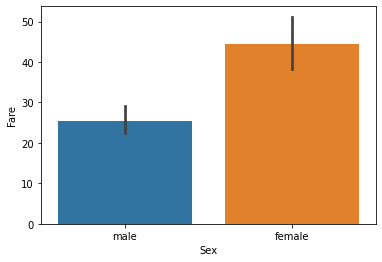

In [41]:
sns.barplot(x = 'Sex', y = 'Fare', data = titanic)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

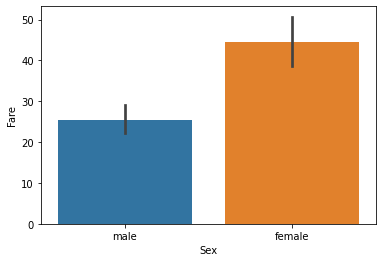

In [42]:
sns.barplot(x = 'Sex', y = 'Fare', data = titanic)

32.50072086330936

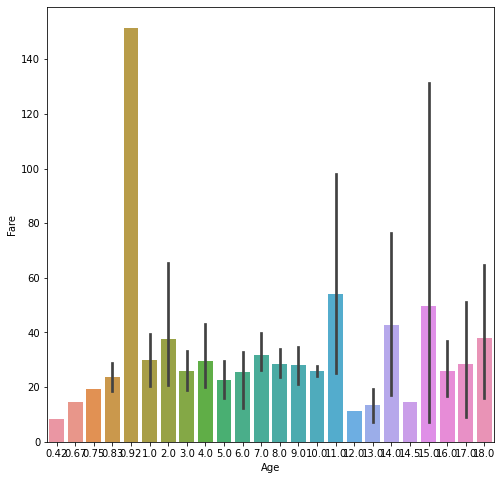

In [43]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'Age', y = 'Fare', data = children) 
children.Fare.mean()

35.22483965217383

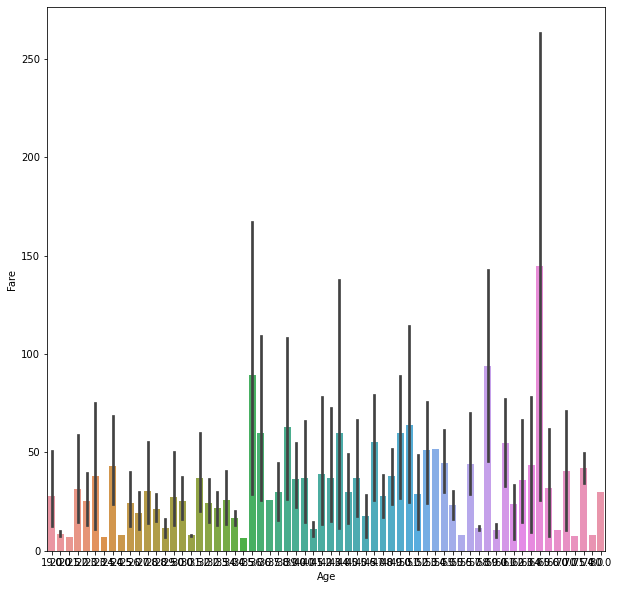

In [46]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'Age', y = 'Fare', data = adults)
adults.Fare.mean()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

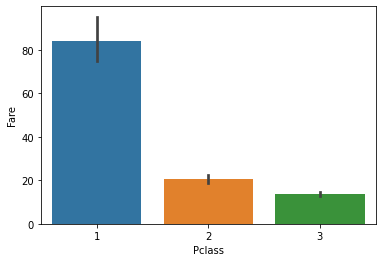

In [47]:
sns.barplot(x = 'Pclass', y = 'Fare', data = titanic) 

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

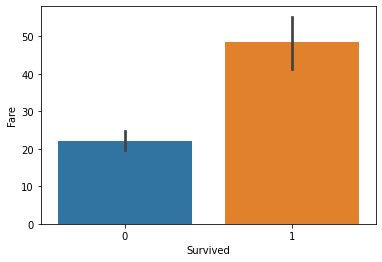

In [48]:
sns.barplot(x = 'Survived', y = 'Fare', data = titanic) 

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

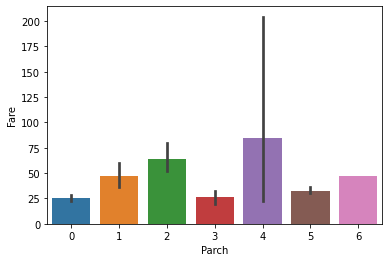

In [49]:
sns.barplot(x = 'Parch', y = 'Fare', data = titanic) 

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

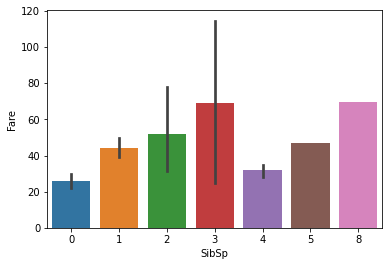

In [50]:
sns.barplot(x = 'SibSp', y = 'Fare', data = titanic) 

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

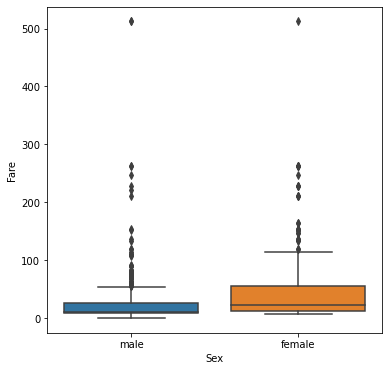

In [51]:
plt.figure(figsize = (6,6))

sns.boxplot(y = 'Fare', x = 'Sex', data=titanic)

In [52]:
titanic[titanic.Sex == 'male'].Fare.median(), titanic[titanic.Sex == 'female'].Fare.median()

(10.5, 23.0)

In [53]:
titanic[titanic.Sex == 'male'].Fare.mean(), titanic[titanic.Sex == 'female'].Fare.mean()

(25.523893414211418, 44.47981783439487)

In [54]:
#Interquartile range:
print("For male passengers:", np.percentile(titanic[titanic.Sex == 'male'].Fare, 25), ",", np.percentile(titanic[titanic.Sex == 'male'].Fare, 75))
print("for female passengers:", np.percentile(titanic[titanic.Sex == 'female'].Fare, 25), ",", np.percentile(titanic[titanic.Sex == 'female'].Fare, 75))

For male passengers: 7.8958 , 26.55
for female passengers: 12.071875 , 55.0


In [55]:
titanic[titanic.Embarked == 'S'].Fare.median(), titanic[titanic.Embarked == 'C'].Fare.median(), titanic[titanic.Embarked == 'Q'].Fare.median()

(13.0, 29.7, 7.75)

In [56]:
titanic[titanic.Embarked == 'S'].Fare.mean(), titanic[titanic.Embarked == 'C'].Fare.mean(), titanic[titanic.Embarked == 'Q'].Fare.mean()

(27.07981180124218, 59.95414404761905, 13.276029870129872)

In [57]:
print("For S:", np.percentile(titanic[titanic.Embarked == 'S'].Fare, 25), ",", np.percentile(titanic[titanic.Embarked == 'S'].Fare, 75))
print("for C:", np.percentile(titanic[titanic.Embarked == 'C'].Fare, 25), ",", np.percentile(titanic[titanic.Embarked == 'C'].Fare, 75))
print("for Q:", np.percentile(titanic[titanic.Embarked == 'Q'].Fare, 25), ",", np.percentile(titanic[titanic.Embarked == 'Q'].Fare, 75))

For S: 8.05 , 27.9
for C: 13.69795 , 78.500025
for Q: 7.75 , 15.5


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

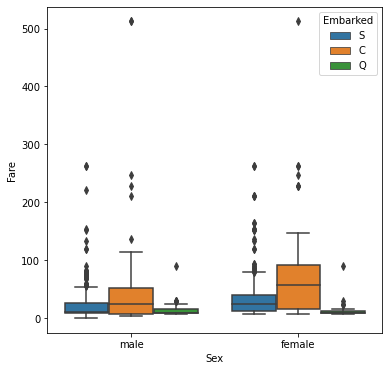

In [58]:
plt.figure(figsize = (6,6))

sns.boxplot(y = 'Fare', x = 'Sex', hue = 'Embarked', data=titanic)

In [59]:
from scipy.stats import chi2_contingency
chisqt = pd.crosstab(titanic.Sex.astype('str'), titanic.Embarked.astype('str'), margins = True)

val = np.array([chisqt.iloc[0].values, chisqt.iloc[1].values])
# desired p-value - 0.01

chi2_contingency(chisqt)

(17.013767349449207,
 0.029966040255214512,
 8,
 array([[5.92053872e+01, 2.71358025e+01, 2.26953984e+02, 7.04826038e-01,
         3.14000000e+02],
        [1.08794613e+02, 4.98641975e+01, 4.17046016e+02, 1.29517396e+00,
         5.77000000e+02],
        [1.68000000e+02, 7.70000000e+01, 6.44000000e+02, 2.00000000e+00,
         8.91000000e+02]]))

In [60]:
chisqt

Embarked,C,Q,S,nan,All
Sex,,,,,
female,73,36,203,2,314
male,95,41,441,0,577
All,168,77,644,2,891


In [61]:
crosstab = pd.crosstab(titanic.Sex, titanic.Embarked ,margins = True)
chi2_contingency(crosstab)

(13.355630515001746,
 0.0377235471251447,
 6,
 array([[ 58.96062992,  27.02362205, 226.01574803, 312.        ],
        [109.03937008,  49.97637795, 417.98425197, 577.        ],
        [168.        ,  77.        , 644.        , 889.        ]]))

In [62]:
crosstab

Embarked,C,Q,S,All
Sex,,,,
female,73,36,203,312
male,95,41,441,577
All,168,77,644,889


In [63]:
titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']].corr() 

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000


<AxesSubplot:title={'center':'Correlation between Numerical Variable'}>

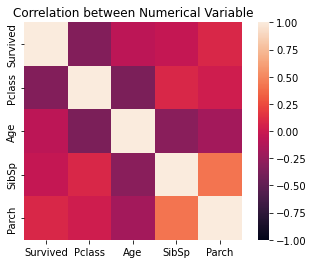

In [64]:
plt.title("Correlation between Numerical Variable")
sns.heatmap(titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']].corr(), square=True, vmin=-1, vmax=1)

In [65]:
titanic.Fare.mean()

32.2042079685746

In [66]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [67]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [68]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [69]:
titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


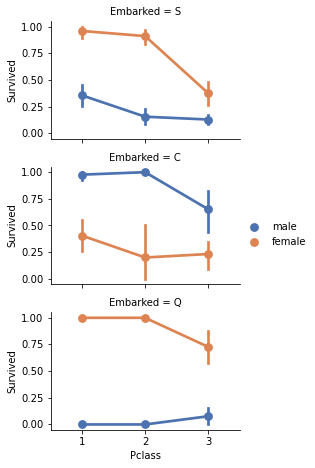

In [70]:
# grid = sns.FacetGrid(titanic, col='Embarked')
grid = sns.FacetGrid(titanic, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Fare', 'Sex', palette='deep')
grid.add_legend()

In [ ]:
# https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [71]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
titanic_new= titanic.drop('Cabin', axis=1)
titanic_new= titanic_new.drop('Name',axis=1)
titanic_new= titanic_new.drop('Ticket', axis=1)
titanic_new= titanic_new.drop('Age', axis=1)
titanic_new

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S
887,888,1,1,female,0,0,30.0000,S
888,889,0,3,female,1,2,23.4500,S
889,890,1,1,male,0,0,30.0000,C


In [73]:
titanic_new_ohe = pd.get_dummies(titanic_new)
titanic_new_ohe.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,0,1,0,0,1
1,2,1,1,1,0,71.2833,1,0,1,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,1
3,4,1,1,1,0,53.1000,1,0,0,0,1
4,5,0,3,0,0,8.0500,0,1,0,0,1


In [74]:
from sklearn.model_selection import train_test_split

X = titanic_new_ohe.drop('Fare', axis=1)
y = titanic_new_ohe['Fare']

# split train data into two parts :  train - 80% and validation - 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [75]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_val)

1869.766998128297

In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_val)

20.72075307414126

In [78]:
lin_reg.coef_  , lin_reg.intercept_ 

(array([ 5.85242927e-03,  5.04451130e+00, -3.11109939e+01,  7.22246283e+00,
         8.54574137e+00,  1.45144864e+00, -1.45144864e+00,  3.29101548e+00,
        -7.60716691e+00, -1.34223660e+01]),
 102.00485047443854)

In [79]:
print(y_val.min(), y_val.max())
print(y_pred.min(), y_pred.max())

0.0 512.3292
-5.9795535058700295 114.0431983512546


In [80]:
print(y_val, '\n\n', y_pred)

707    26.2875
37      8.0500
615    65.0000
169    56.4958
68      7.9250
        ...   
89      8.0500
80      9.0000
846    69.5500
870     7.8958
251    10.4625
Name: Fare, Length: 179, dtype: float64 

 [ 6.52080731e+01 -5.97955351e+00  6.07754986e+01 -5.20703284e+00
  4.81306144e+01 -2.64952125e+00  6.47574361e+01 -1.60193641e+00
  7.93779346e+01  3.63979318e+01  2.50319491e+01  7.40400464e+01
  3.29500955e+01  2.89829897e+00  2.61152993e+00  1.00974444e+01
  3.17104115e+01 -2.70219312e+00  2.60743321e+01  1.25778594e+00
  8.29172155e+01  3.49820119e+01  1.01976912e+01  6.28194328e+00
  4.56003132e-01  1.85261372e+01  3.55427217e+01  6.40501400e+01
 -4.11848100e+00  2.67701206e+01 -1.28005280e+00 -5.14850855e+00
  4.74461629e+01  5.71085938e+01  7.90069449e+01  7.54021558e+00
  6.70165662e+01  4.92667412e+01 -4.23552958e+00  2.96670730e+01
 -3.47471378e+00  3.28603667e+00  2.57650772e+00  3.19762070e+00
 -2.38030951e+00  7.59990790e+01  6.76427761e+01 -5.27140956e+00
  1.87981928